In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
series = pd.read_csv(r"/content/temperaturi_max.csv")
print(series.head(10))
print(series.size)

        Data  Temperatura
0   1/1/1981         20.7
1   1/2/1981         17.9
2   1/3/1981         18.8
3   1/4/1981         14.6
4   1/5/1981         15.8
5   1/6/1981         15.8
6   1/7/1981         15.8
7   1/8/1981         17.4
8   1/9/1981         21.8
9  1/10/1981         20.0
7300


In [ ]:
print(series.describe())

       Temperatura
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


In [46]:
#get all the data until 1990
x_train = series.iloc[0:3285,:]
print("Train dataset\n", x_train.head())
print(x_train.size)
print(x_train.loc[3284,:])

x_test = series.iloc[3285:3650]
print("Test dataset\n", x_test.head())
print(x_test.size)
print(x_test.loc[3649,:])



Train dataset
        Data  Temperatura
0  1/1/1981         20.7
1  1/2/1981         17.9
2  1/3/1981         18.8
3  1/4/1981         14.6
4  1/5/1981         15.8
6570
Data           12/31/1989
Temperatura          12.7
Name: 3284, dtype: object
Test dataset
           Data  Temperatura
3285  1/1/1990         14.8
3286  1/2/1990         13.3
3287  1/3/1990         15.6
3288  1/4/1990         14.5
3289  1/5/1990         14.3
730
Data           12/31/1990
Temperatura          13.0
Name: 3649, dtype: object


In [47]:
y_train = x_train['Temperatura']
y_test = x_test['Temperatura']

x_train = x_train['Data']
x_test =  x_test['Data']


print("x_test\n", x_test.head())
print("x_test\n", x_test.shape)
print("y_test\n", y_test.head())
print("y_test\n", y_test.shape)

x_test
 3285    1/1/1990
3286    1/2/1990
3287    1/3/1990
3288    1/4/1990
3289    1/5/1990
Name: Data, dtype: object
x_test
 (365,)
y_test
 3285    14.8
3286    13.3
3287    15.6
3288    14.5
3289    14.3
Name: Temperatura, dtype: float64
y_test
 (365,)


        Data  Temperatura
0   1/1/1981         20.7
1   1/2/1981         17.9
2   1/3/1981         18.8
3   1/4/1981         14.6
4   1/5/1981         15.8
5   1/6/1981         15.8
6   1/7/1981         15.8
7   1/8/1981         17.4
8   1/9/1981         21.8
9  1/10/1981         20.0
7300
        Data  Temperatura
0   1/1/1981         20.7
1   1/2/1981         17.9
2   1/3/1981         18.8
3   1/4/1981         14.6
4   1/5/1981         15.8
5   1/6/1981         15.8
6   1/7/1981         15.8
7   1/8/1981         17.4
8   1/9/1981         21.8
9  1/10/1981         20.0
3649


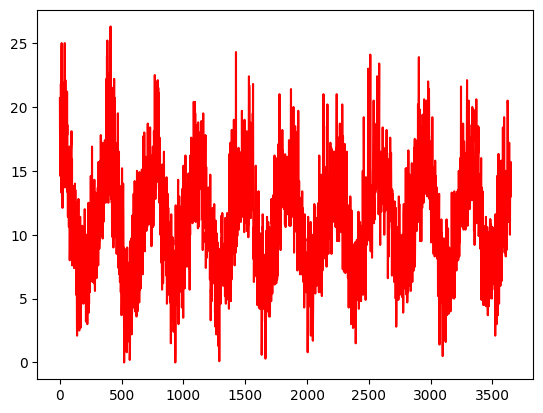




TRAIN
 [[0.7870723 ]
 [0.6806084 ]
 [0.7148289 ]
 ...
 [0.39543727]
 [0.54752856]
 [0.48288977]]



TEST
 [[0.5627377 ]
 [0.50570345]
 [0.5931559 ]
 [0.5513308 ]
 [0.54372627]
 [0.5817491 ]
 [0.6235742 ]
 [0.5627377 ]
 [0.661597  ]
 [0.7148289 ]
 [0.84030426]
 [0.7224335 ]
 [0.5893537 ]
 [0.6007605 ]
 [0.5589354 ]
 [0.40684414]
 [0.4372624 ]
 [0.57034224]
 [0.5513308 ]
 [0.5513308 ]
 [0.50570345]
 [0.54372627]
 [0.54372627]
 [0.7794677 ]
 [0.57034224]
 [0.6501902 ]
 [0.6425856 ]
 [0.6425856 ]
 [0.5171103 ]
 [0.6235742 ]
 [0.61216736]
 [0.4562738 ]
 [0.46387836]
 [0.5627377 ]
 [0.5627377 ]
 [0.54752856]
 [0.4904943 ]
 [0.50950575]
 [0.60456276]
 [0.61216736]
 [0.66920155]
 [0.5931559 ]
 [0.57034224]
 [0.4942966 ]
 [0.5361217 ]
 [0.6577947 ]
 [0.5969582 ]
 [0.70722437]
 [0.48288977]
 [0.5323194 ]
 [0.5209126 ]
 [0.6197719 ]
 [0.7604563 ]
 [0.6463879 ]
 [0.5779468 ]
 [0.62737644]
 [0.62737644]
 [0.6577947 ]
 [0.7262358 ]
 [0.73384035]
 [0.6577947 ]
 [0.7224335 ]
 [0.7528517 ]
 [0.73384

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas

dataset = pd.read_csv(r"/content/temperaturi_max.csv", engine ='python')
print(series.head(10))
print(series.size)

dataset = pd.read_csv(r"/content/temperaturi_max.csv",usecols=[1], engine ='python')
print(series.head(10))
print(len(dataset[1:]))
plt.plot(dataset, color='red')
plt.show()

def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return np.array(dataX), np.array(dataY)

np.random.seed(7)

dataframe = pd.read_csv(r"/content/temperaturi_max.csv",usecols=[1], engine ='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

#selectam datele pana in 1990 pt train si cele din 1990 pt test
train, test = dataset[0:3285,:], dataset[3285:3650]
print("\n\n\nTRAIN\n", train)
print("\n\n\nTEST\n", test)


look_back=1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test,look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [57]:
#Create model + train
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)



Epoch 1/100
3283/3283 - 7s - loss: 0.0146 - 7s/epoch - 2ms/step
Epoch 2/100
3283/3283 - 6s - loss: 0.0099 - 6s/epoch - 2ms/step
Epoch 3/100
3283/3283 - 5s - loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 4/100
3283/3283 - 6s - loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 5/100
3283/3283 - 5s - loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 6/100
3283/3283 - 6s - loss: 0.0099 - 6s/epoch - 2ms/step
Epoch 7/100
3283/3283 - 5s - loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 8/100
3283/3283 - 6s - loss: 0.0099 - 6s/epoch - 2ms/step
Epoch 9/100
3283/3283 - 5s - loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 10/100
3283/3283 - 6s - loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 11/100
3283/3283 - 5s - loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 12/100
3283/3283 - 6s - loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 13/100
3283/3283 - 6s - loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 14/100
3283/3283 - 5s - loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 15/100
3283/3283 - 8s - loss: 0.0098 - 8s/epoch - 2ms/step
Epoch 16/100
3283/3283 - 6s - loss

12/12 [==============================] - 0s 2ms/step
[[17.89999953 18.79999906 14.59999969 ... 11.70000016 10.39999953
  14.40000031]]
Scor antrenare: 2.59 RMSE
Scor testare: 2.44 RMSE


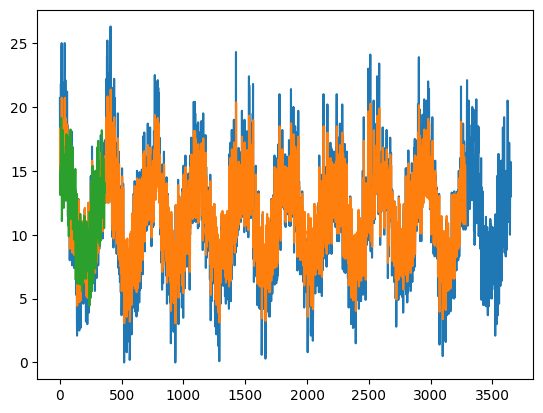

In [65]:
trainPredict=model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
print(trainY)
#trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

#error

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Scor antrenare: %.2f RMSE'% (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Scor testare: %.2f RMSE'% (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[look_back:len(testPredict)+look_back,:] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
